In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
date_list = pd.date_range('2020-07-01', periods=100, freq='D')

In [3]:
movie_title = []
movie_point = []
movie_date = []

for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=" + (today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")

    titles = soup.find_all('div', {'class': 'tit5'})
    points = soup.find_all('td', {'class': 'point'})

    titles_text = []
    points_text = []
    date = []

    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)

    movie_title += titles_text
    movie_point += points_text
    movie_date += date

In [4]:
frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
# frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


In [8]:
# # expr = "title == ['토이 스토리 3', '그린 북']"
#
# expr = "title == ['토이 스토리 3']"
# search_movie = frame.query(expr)
#
# print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


In [13]:
input_title = input()
search_movie = frame.query('title == "{}"'.format(input_title))

In [14]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

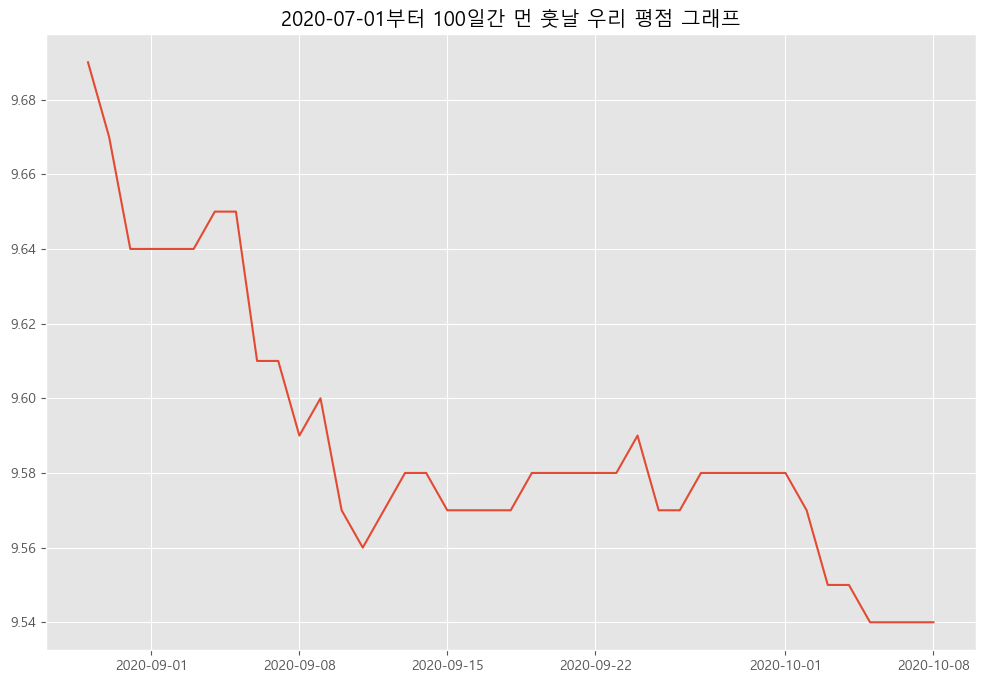

In [16]:
plt.figure(figsize=(12, 8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()